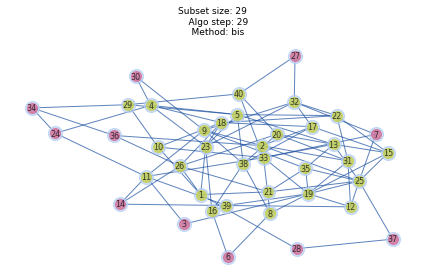

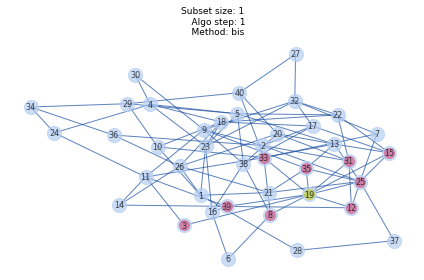

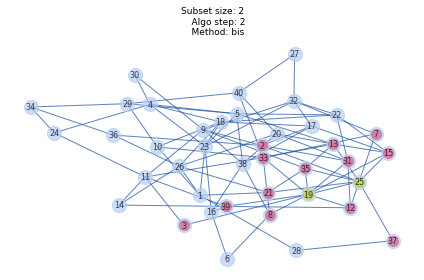

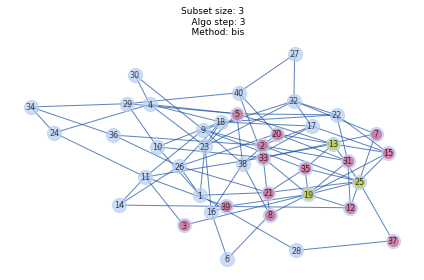

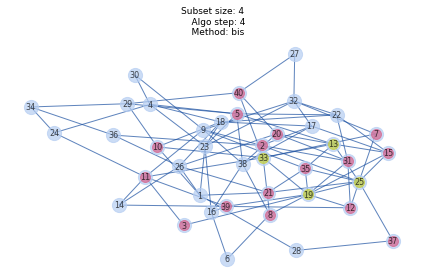

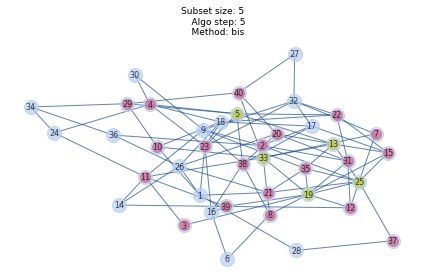

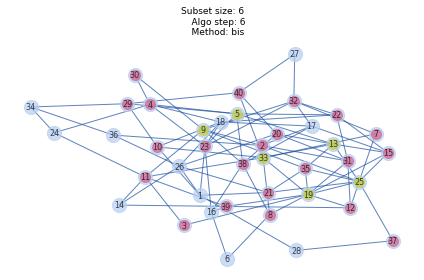

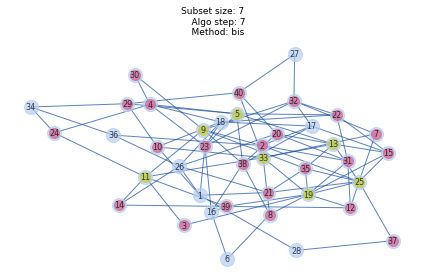

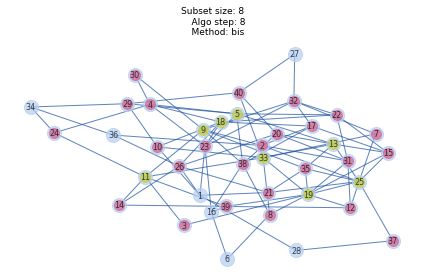

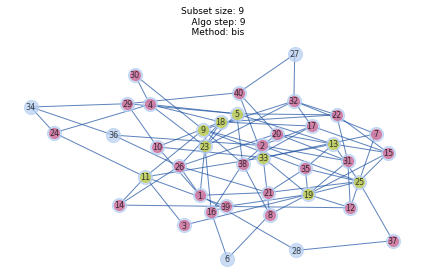

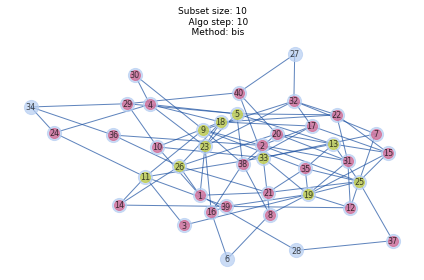

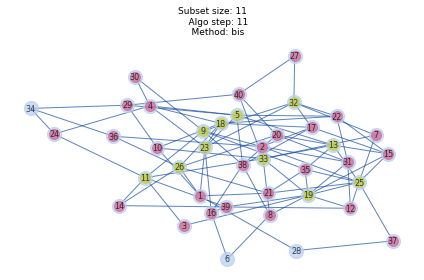

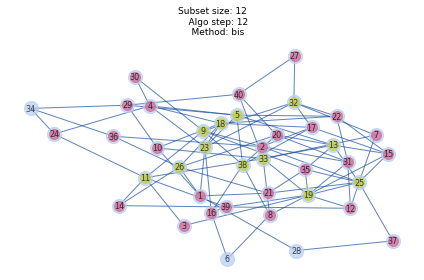

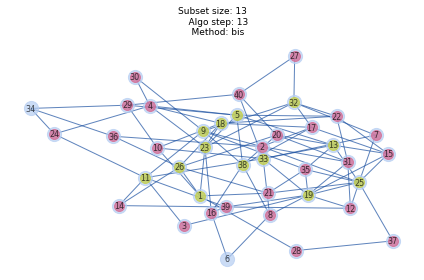

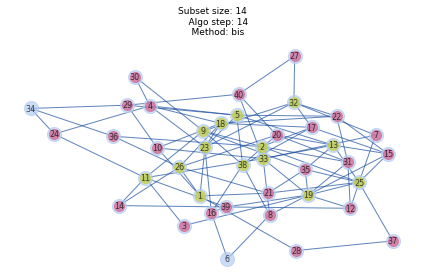

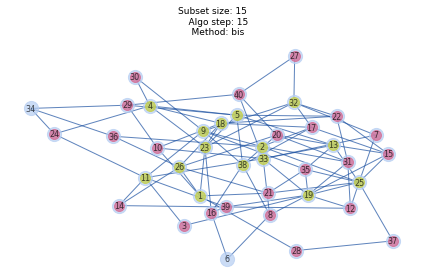

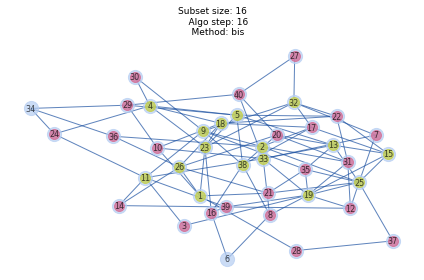

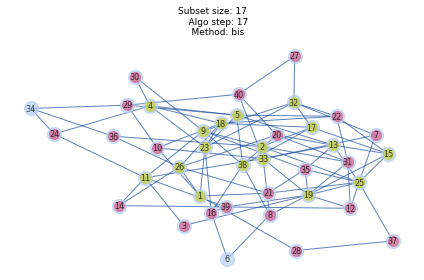

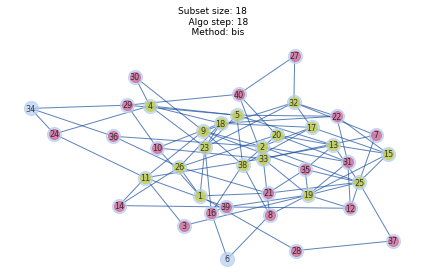

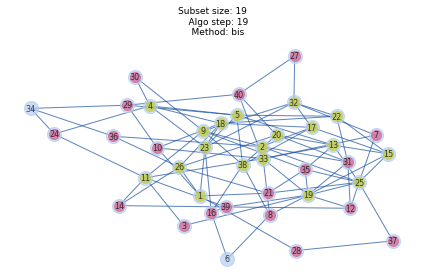

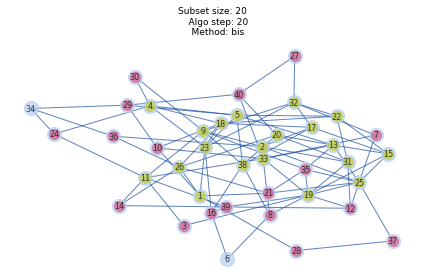

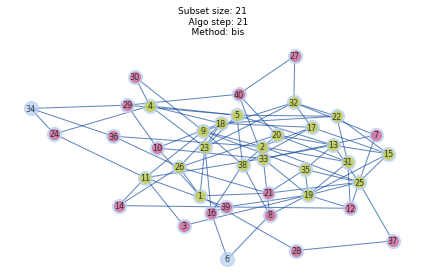

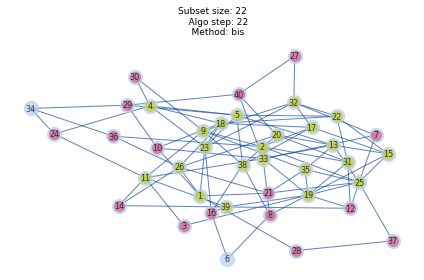

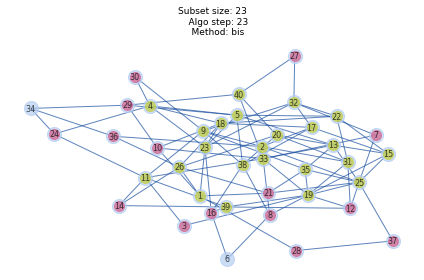

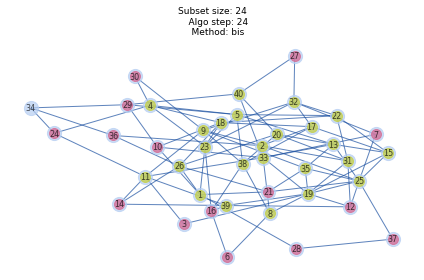

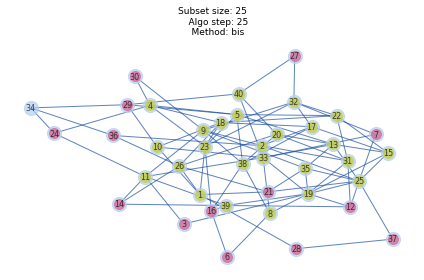

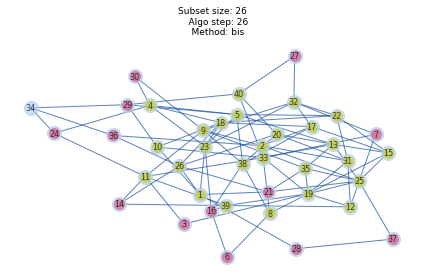

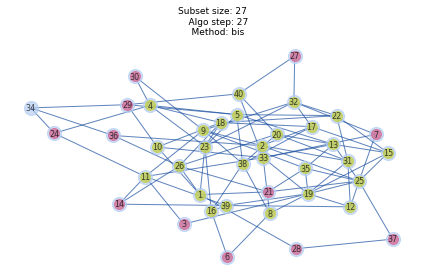

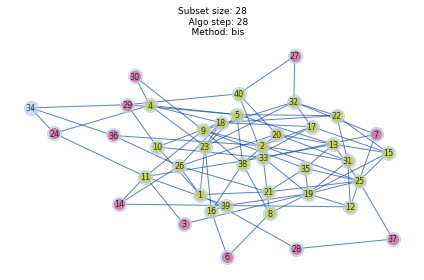

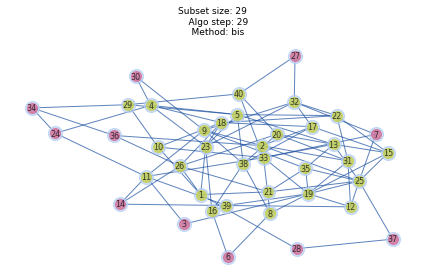

In [3]:
"""
   greedy algorithm to try to find a minimal dominating set
"""
%matplotlib inline
import importlib
import pylab as pl
from IPython import display
import time
import pickle
import os
from plot_graph import plot_graph_notebook
from read_params import read_params
importlib.reload(plot_graph_notebook)


def process_graph(graph_name):
    # load graph data
    with open(f"data/{graph_name}_neighbors", "rb") as f:
        neighbors = pickle.load(f)

    with open(f"data/{graph_name}_edges", "rb") as f:
        edges_list = pickle.load(f)

    # clean folder
    dir_name = f"images/{graph_name}"
    for filename in os.listdir(dir_name):
        if "initial" not in filename and "bis" in filename:
            path_to_file = os.path.join(dir_name, filename)
            os.remove(path_to_file)

    # print(neighbors)
    # size of the graph (number of nodes)
    n_nodes = len(neighbors)

    """
        sort the nodes by degree
        aka the number of neighbors
        """
    sorted_nodes = sorted(neighbors,
                          key=lambda node: len(neighbors[node]),
                          reverse=True)
    # sorted does not modify the original sequence
    # it returns a list
    # print(type(sorted_nodes))

    print('=====')
    print('sorted dictionary of neighbors by degree of the node')
    print('=====')

    for node in sorted_nodes:
        print(f"node  {node}")
        print(f"neighbors {neighbors[node]}")

    """
        greedy algorithm
    """

    print('\n======')
    print('greedy algorithm')
    print('======')

    selected_nodes = list()
    dominated_nodes = list()
    step = 0

    for node in sorted_nodes:
        step += 1
        # stop if the set is dominating
        if len(dominated_nodes) < n_nodes:
            # update our selected subset
            selected_nodes.append(node)
            print(f"\nadd {node} to the dominating set")
            # update the list of dominated nodes
            if node not in dominated_nodes:
                dominated_nodes.append(node)
            print(f"add {node} to the list of dominated nodes")
            # print('neighbors : ')
            for neighbor in neighbors[node]:
                if neighbor not in dominated_nodes:
                    # update the list of not dominated nodes
                    dominated_nodes.append(neighbor)
                    print(f"add {neighbor} to the list of dominated nodes")
            # see how many more nodes we have to dominate
            print(
                f"still have to dominate {n_nodes-len(dominated_nodes)} nodes")
            plot_graph_notebook.plot_subset(step,
                            sorted_nodes,
                            edges_list,
                            dominated_nodes,
                            selected_nodes,
                            graph_name,
                            method="bis")
            display.clear_output(wait=True)
            display.display(pl.gcf())
            time.sleep(0.3)



process_graph("exercise")

# process_graph("custom")
# params=read_params()
# n_nodes =params[0]
# max_successors = params[1]
# parameters = f"n={n_nodes}_maxs={max_successors}"
# process_graph(parameters)

# process_graph("custom")